Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your collaborators below:

In [1]:
COLLABORATORS = ""

---

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import animal_guessing_game

---

In this problem you are going to play an animal guessing game. In this game, players are shown some features of a particular animal and the goal is to guess which animal has these features. The player is first shown two features of the animal, and then a list of animals to guess from. If the player guesses incorrectly, more features are shown and they will get more chances to guess the animal. If they cannot guess the animal correctly after all the features have been displayed, then they lose.

## Part A (1 point)

Run the game by running the function `animal_guessing_game.play` below. This script will play the game for varying numbers of animals to choose from. Specifically, the game will run 15 times: displaying either 2, 4, 8, 16, or 32 animals to select an answer from, and running 3 iterations for each of these settings. The function `animal_guessing_game.play` saves the results of the game to the `data` directory upon completion in a NumPy file called `my_trial_data.npy`.

This file, `my_trial_data.npy`, will contain an array of shape `(3, 5)` matrix, where the rows are iterations, and the columns are number of animals shown.

<div class="alert alert-success">Uncomment the following cell and run it to play the game. When your submit your problem set, your data will be automatically included in the submission.</div>

<div class="alert alert-warning">Warning: the features used in this guessing game are a little weird and sometimes counterintuitive. Just do your best, even if the features seem surprising.</div>

In [3]:
my_trial_data = animal_guessing_game.play()
my_trial_data

Loading existing data from 'data/my_trial_data.npy'


array([[ 2,  1,  7,  2,  1],
       [ 1,  2,  5, 12,  4],
       [ 1,  3,  4,  3, 29]])

In [4]:
"""Check that my_trial_data exists and is in the correct format."""
from nose.tools import assert_equal
data = np.load("data/my_trial_data.npy")
assert_equal(data.shape, (3, 5))
assert_equal(data.dtype, np.int64)

print("Success!")

Success!


<div class="alert alert-success">Describe your experience playing the game. Did it become more difficult with more animals? (**0.25 points**)</div>

The experience became much more difficult with more animals added. Especially because many of the animals shared similar characteristics so it only became apparent which one it was after many features were given. 

<div class="alert alert-success">Do you feel like this difficulty scaled linearly (i.e., was it twice as hard to play with twice as many animals, or was it less than twice as hard, or more than twice as hard)? (**0.25 points**)</div>

I felt this difficult scaled linearly (twice as hard to play with twice as many animals). However, the features generated could make it a little bit easier for the guess or a little bit harder.

---

## Part B (1 point)

<div class="alert alert-success">Let's try to model the inferences made by players of this game using a simple program. Your program should play the game by looking at the given choices (animals) and observations (features) and ruling out possible hypotheses.</div>

In [5]:
def guess_animal(observations, animals):
    """Guesses an animal based on the set of allowed choices, the 
    observed features, and knowledge of which animals have which 
    features.
    
    Hint: this problem is very similar to the `guess_language` function in
    Problem 2.
    
    Your solution can be done in 3 lines of code, including the return
    statement.
    
    Parameters
    ----------
    observations : set of strings
        The names of the features that we have observed
    animals : dictionary of sets
        A dictionary where the keys are the animals we have to
        choose from, and where the values are a set of the features
        belonging to that animal.
        
    Returns
    -------
    The name of the animal which is our guess.
    
    """
    for animal in animals:
        if observations.issubset(animals.get(animal)):
            return animal

For example, we can test this on a small subset of animals:

In [6]:
animals = {
    'raccoon': {'grey',},
    'grizzly bear': {'bulbous',},
    'killer whale': {'bulbous', 'lean', 'flippers'}
}

guess_animal({'grey',}, animals) # should return 'killer whale'

'raccoon'

In [7]:
# add your own test cases here!

In [8]:
"""Check the implementation of guess_animal"""
from nose.tools import assert_equal

for n in range(1, 21):
    animals = {}
    for i in range(n):
        features = set("feature_{}".format(j) for j, f in enumerate(np.random.randint(0, 2, 30).astype(bool)) if f)
        animals["animal_{}".format(i)] = features

    target = "animal_{}".format(np.random.randint(0, n))
    features = list(animals[target])
    np.random.shuffle(features)

    for j in range(1, n):
        observations = features[:j]
        guess = guess_animal(set(observations), animals)
        
        for obs in observations:
            assert obs in animals[guess], "The guessed animal {} does not have feature '{}'".format(guess, obs)
    
print("Success!")

Success!


---

## Part C (1 point)

Once you have your `guess_animal` function working, you can use it to actually play the game. The `animal_guessing_game.model` function takes as an argument the guessing function, and plays the game 500 times at each of the different hypothesis sizes:

In [9]:
model_trial_data = animal_guessing_game.model(guess_animal)

Saving trial data to 'data/model_trial_data.npy'


It produces an array with shape `(500, 5)`, that contains 500 model simulations for each of the 5 hypothesis sizes:

In [10]:
model_trial_data.shape

(500, 5)

In [11]:
model_trial_data

array([[ 1,  1,  2,  3,  1],
       [ 1,  1,  4,  8,  1],
       [ 5,  1,  1,  1,  7],
       ..., 
       [ 1,  1,  8,  1, 10],
       [ 1,  1,  3,  1, 10],
       [ 1,  1,  1,  1,  2]])

The students who took this class last year also played the animal guessing game. We have provided you with their data in a file called `old_trial_data.npy` (which is saved in the `data` directory). This is a NumPy array with shape `(294, 5)`, corresponding to 294 repetitions of each of the 5 hypothesis sizes:

In [12]:
old_trial_data = np.load("data/old_trial_data.npy")
old_trial_data

array([[ 1,  1,  1,  2,  2],
       [ 1,  2,  1,  1,  5],
       [ 1,  2,  3, 14,  1],
       ..., 
       [ 1,  1,  4,  1, 13],
       [ 1,  1,  3,  1,  9],
       [ 2,  2,  4,  2,  5]])

<div class="alert alert-success">To compare this to the model data simulations we just ran, let's take the mean across repetitions and then plot it. To help us do this, we will create a generic function, `plot_trial_data`, which takes an array of trial data, computes the mean, plots it, and then returns the mean.</div>

In [13]:
def plot_trial_data(axis, trial_data, label):
    """Plot the mean of the given trial data against the hypotheses
    used in the animal guessing game (2, 4, 8, 16, and 32). Label
    the line in the plot using the given label. Returns the computed
    mean trial data.
    
    Make sure you also label your axes and give the plot a title.
    
    Note: to add a label to a line, use the `label` keyword argument
    to the `plot` function.
    
    Hint: your solution can be done in 6 lines of code, including the
    return statement.
    
    Parameters
    ----------
    axis : matplotlib axis object
    trial_data : numpy array of shape (n, 5)
        The rows correspond to repetitions of the game, and the
        columns correspond to the different hypothesis sizes.
    label : string
        The label to apply to the line in the trial data plot.
        
    Returns
    -------
    The mean of `trial_data`, which should be a numpy array with
    shape (5,).
    
    """
    trial_mean = trial_data.mean(axis=0)
    hypotheses = np.array([2,4,8,16,32])
    axis.plot(hypotheses, trial_mean, '-', label = label)
    axis.set_xticks([2,4,8,16,32])
    axis.set_title("trial data means")
    axis.set_ylabel("means")
    axis.set_xlabel("# hypotheses")
    return trial_mean

You can use your plotting function to visualize the results from your model:

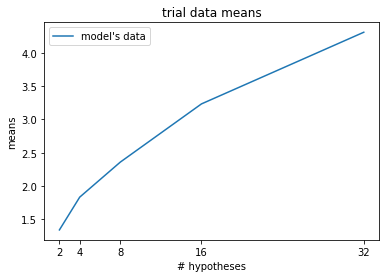

In [14]:
fig, axis = plt.subplots()
plot_trial_data(axis, np.load("data/model_trial_data.npy"), "model's data")
axis.legend(loc='best');

In [15]:
# add your own test cases here!


In [16]:
from plotchecker import get_data
from nose.tools import assert_equal, assert_not_equal
from numpy.testing import assert_array_equal

for i in range(2):
    # generate some random data
    data = np.random.randint(1, 30, (np.random.randint(10, 200), 5))
    atad = np.random.randint(1, 30, (np.random.randint(10, 200), 5))

    # plot it
    figure, axis = plt.subplots()
    mean_data = plot_trial_data(axis, data, "label {}".format(i))
    legend = axis.legend(loc='best')

    # make sure the mean data is correct
    assert_array_equal(mean_data, np.mean(data, axis=0))

    # check the plot data
    plot_data = get_data(axis)
    assert_array_equal(plot_data, np.vstack([[2, 4, 8, 16, 32], mean_data]).T)

    # check that plot uses solid lines
    lines = axis.get_lines()[0]
    assert_equal(lines.get_linestyle(), '-')
    
    # check axis labels and title
    assert_not_equal(axis.get_xlabel(), '')
    assert_not_equal(axis.get_ylabel(), '')
    assert_not_equal(axis.get_title(), '')

    # check the legend
    assert legend is not None, "line is not correctly labeled"
    legend_text = legend.get_texts()
    assert_equal(len(legend_text), 1)
    assert_equal(legend_text[0].get_text(), "label {}".format(i))
    
    # check lines have different colors
    new_data = plot_trial_data(axis, atad, "label {}".format(i+2))
    colors = [a.get_color() for a in axis.get_lines()]
    assert_equal(len(colors), len(np.unique(colors)))
    
    # close the plot
    plt.close(figure)

print("Success!")

Success!


---

## Part D

Once you have completed `plot_trial_data`, let's use it to plot your data, last year's data, and the model simulations:

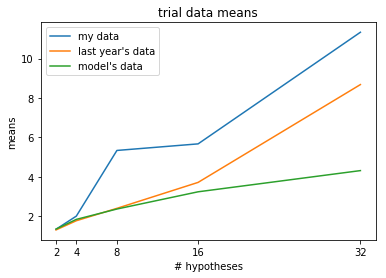

In [17]:
fig, axis = plt.subplots()
plot_trial_data(axis, np.load("data/my_trial_data.npy"), "my data")
plot_trial_data(axis, np.load("data/old_trial_data.npy"), "last year's data")
plot_trial_data(axis, np.load("data/model_trial_data.npy"), "model's data")
axis.legend(loc='best');

<div class="alert alert-success">Does the model seem to play the game in the same way that the students from last year did? Did it play the same way that you did? Explain your answer. (**0.5 points**)</div>

The model plays the game similarly to the data from last year's students up until around the eigth hypotheses; then the model starts performing better than the students from last year. It plays much better than my attempts at the game overall. 

<div class="alert alert-success">If yes, do you think the model is a good account of people's inductive inferences in this type of guessing game? If not, why do you think the model behaves differently from people (that is, what is missing in the model that causes it to be a poor account)? (**0.5 points**)</div>

The model behaves differently than people because it is essentially just playing a matching game (it uses a predefined set of features, finds the subset and matches it to the animal). Humans perform differentl because we do not know this predefined set of features for each animal, and therefore we use the set of features given to us as well as a much larger and broader intuition of all the animals that could fall in that set. Therefore, we would not know that a dog has 'long legs' or that a mouse is 'black'. Therefore, the model is missing a vastly larger and broader set of knowledge that humans employ to try and solve these problems and is the reason it performs differently. 

---

Before turning this problem in remember to do the following steps:

1. **Restart the kernel** (Kernel$\rightarrow$Restart)
2. **Run all cells** (Cell$\rightarrow$Run All)
3. **Save** (File$\rightarrow$Save and Checkpoint)

<div class="alert alert-danger">After you have completed these three steps, ensure that the following cell has printed "No errors". If it has <b>not</b> printed "No errors", then your code has a bug in it and has thrown an error! Make sure you fix this error before turning in your problem set.</div>

In [18]:
print("No errors!")

No errors!
